In [1]:
!pip install altair==5.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.5/232.5 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: altair
    Found existing installation: altair 4.2.2
    Uninstalling altair-4.2.2:
      Successfully uninstalled altair-4.2.2


In [2]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e61f3e01825b788555c4afa173aa13d1f5bfeeddd855b1713bb1d611b7c344ec
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
import pandas as pd
# from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from altair import datum


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('/content/drive/MyDrive/Atividades-VisualizacaoComp/trabalho/dataset.csv', index_col=False)
df.head()

,UNITID,school_name,city,state,zip,school_webpage,latitude,longitude,admission_rate,sat_verbal_midrange,sat_math_midrange,sat_writing_midrange,act_combined_midrange,act_english_midrange,act_math_midrange,act_writing_midrange,sat_total_average,undergrad_size,percent_white,percent_black,percent_hispanic,percent_asian,percent_part_time,average_cost_academic_year,average_cost_program_year,tuition_(instate),tuition_(out_of_state),spend_per_student,faculty_salary,percent_part_time_faculty,percent_pell_grant,completion_rate,predominant_degree,highest_degree,ownership,region,gender,carnegie_basic_classification,carnegie_undergraduate,carnegie_size,religious_affiliation,percent_female,agege24,faminc,mean_earnings_6_years,median_earnings_6_years,mean_earnings_10_years,median_earnings_10_years
0,100654,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,34.7834,-86.5685,0.8989,410.0,400.0,NaN,17.0,17.0,17.0,NaN,823.0,4051.0,0.0279,0.9501,0.0089,0.0022,0.0622,18888.0,NaN,7182.0,12774.0,7459.0,7079.0,0.8856,0.7115,0.2914,Bachelors,Graduate,Public,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",COED,Master's Colleges and Universities (larger pro...,"Full-time four-year, inclusive","Medium 4-year, highly residential (3,000 to 9,...",NaN,0.53,0.08,40211.22,26100.0,22800.0,35300.0,31400.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,www.uab.edu,33.5022,-86.8092,0.8673,580.0,585.0,NaN,25.0,26.0,23.0,NaN,1146.0,11200.0,0.5987,0.2590,0.0258,0.0518,0.2579,19990.0,NaN,7206.0,16398.0,17208.0,10170.0,0.9106,0.3505,0.5377,Bachelors,Graduate,Public,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",COED,Research Universities (very high research acti...,"Medium full-time four-year, selective, higher ...","Large 4-year, primarily nonresidential (over 9...",NaN,0.65,0.26,49894.65,37400.0,33200.0,46300.0,40300.0
2,100690,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,32.3626,-86.1740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322.0,0.2919,0.4224,0.0093,0.0031,0.3727,12300.0,NaN,6870.0,6870.0,5123.0,3849.0,0.6721,0.6839,0.6667,Bachelors,Graduate,Private nonprofit,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",COED,Baccalaureate Colleges--Arts & Sciences,"Medium full-time four-year, inclusivestudents ...","Very small 4-year, primarily nonresidential (l...",Churches of Christ,0.51,0.83,38712.18,38500.0,32800.0,42100.0,38100.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,34.7228,-86.6384,0.8062,575.0,580.0,NaN,26.0,26.0,25.0,NaN,1180.0,5525.0,0.7012,0.1310,0.0338,0.0364,0.2395,20306.0,NaN,9192.0,21506.0,9352.0,9341.0,0.6555,0.3281,0.4835,Bachelors,Graduate,Public,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",COED,Research Universities (very high research acti...,"Medium full-time four-year, selective, higher ...","Medium 4-year, primarily nonresidential (3,000...",NaN,0.55,0.29,54155.40,39300.0,36700.0,52700.0,46600.0
4,100724,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu/email/index.aspx,32.3643,-86.2957,0.5125,430.0,425.0,NaN,17.0,17.0,17.0,NaN,830.0,5354.0,0.0161,0.9285,0.0114,0.0015,0.0902,17400.0,NaN,8720.0,15656.0,7393.0,6557.0,0.6641,0.8265,0.2517,Bachelors,Graduate,Public,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",COED,Master's Colleges and Universities (larger pro...,"Full-time four-year, inclusive","Medium 4-year, primarily residential (3,000 to...",NaN,0.57,0.11,31846.99,21200.0,19300.0,30700.0,27800.0


In [7]:
# profile = ProfileReport(df)
# profile

In [8]:
# Para as colunas que representam dados sobre os resultados dos testes de admissao(SAT e ACT)
# vamos criar uma coluna que vai representar o quao bom a universidade é, vão existir 3 classes:
# Top, average e bad. A classificação das universidades foi retirada da internet

top_25_universities = [
    "Harvard University",
    "Massachusetts Institute of Technology",
    "Stanford University",
    "University of California-Berkeley",
    "University of Washington",
    "University of California-Los Angeles",
    "University of California-San Francisco",
    "Columbia University",
    "Yale University",
    "University of Michigan-Ann Arbor",
    "University of Pennsylvania",
    "University of Texas at Austin",
    "Johns Hopkins University",
    "California Institute of Technology",
    "University of California-San Diego",
    "University of North Carolina-Chapel Hill",
    "Northwestern University",
    "Duke University",
    "University of Chicago",
    "Cornell University",
    "University of Wisconsin-Madison",
    "New York University",
    "University of Illinois-Urbana-Champaign",
    "Washington University in St. Louis",
    "University of Minnesota-Twin Cities"
]

# Top 100 universidades, sem o top 25
top_100_universities = [
    "Purdue University-West Lafayette",
    "Pennsylvania State University-University Park",
    "University of Southern California",
    "Ohio State University-Columbus",
    "Princeton University",
    "University of California-Davis",
    "University of Colorado Boulder",
    "University of Florida",
    "Rockefeller University",
    "Vanderbilt University",
    "Rice University",
    "University of Maryland-College Park",
    "Brown University",
    "Boston University",
    "Emory University",
    "University of Pittsburgh",
    "Dartmouth College",
    "Carnegie Mellon University",
    "University of Virginia",
    "Rutgers University-New Brunswick",
    "Texas A&M University-College Station",
    "Michigan State University",
    "University of California-Irvine",
    "University of California-Santa Barbara",
    "University of Rochester",
    "Case Western Reserve University",
    "Georgia Institute of Technology",
    "University of Arizona",
    "Indiana University-Bloomington",
    "Stony Brook University",
    "University of Iowa",
    "Arizona State University-Tempe",
    "George Washington University",
    "University of Notre Dame",
    "Tufts University",
    "University of Utah",
    "University of Massachusetts Amherst",
    "University of Connecticut",
    "Yeshiva University",
    "University at Buffalo-SUNY",
    "University of Delaware",
    "University of California-Santa Cruz",
    "University of Kansas",
    "University of Oregon",
    "University of Texas Southwestern Medical Center",
    "Tulane University",
    "University of Cincinnati",
    "Northeastern University",
    "Mayo Clinic Alix School of Medicine",
    "University of Georgia",
    "Washington State University",
    "University of Miami",
    "University of Texas MD Anderson Cancer Center",
    "Florida State University",
    "University of Missouri-Columbia",
    "Clemson University",
    "Oregon Health & Science University",
    "Colorado State University",
    "Baylor College of Medicine",
    "Temple University",
    "Virginia Tech",
    "University of Kentucky",
    "University of Alabama-Birmingham",
    "Medical University of South Carolina",
    "Iowa State University",
    "George Mason University",
    "Auburn University",
    "University of Tennessee-Knoxville",
    "University of South Florida",
    "Loyola University Chicago",
    "University of Oklahoma-Norman Campus",
    "Thomas Jefferson University",
    "University of Nebraska-Lincoln"
]

seen = set()
top_25_universities = [x for x in top_25_universities if not (x in seen or seen.add(x))]
top_100_universities = [x for x in top_100_universities if not (x in seen or seen.add(x))]

def classify_university(school_name):
    if school_name in top_25_universities:
        return "Top"
    elif school_name in top_100_universities:
        return "Average"
    else:
        return "Bad"

df['classification'] = df['school_name'].apply(classify_university)
df[['school_name', 'classification']].head()

,school_name,classification
0,Alabama A & M University,Bad
1,University of Alabama at Birmingham,Bad
2,Amridge University,Bad
3,University of Alabama in Huntsville,Bad
4,Alabama State University,Bad


In [9]:
from sklearn.impute import SimpleImputer

# Antes de imputar valores, salvar quais universidades apresentam dados nulos
colunas_nota = ['sat_verbal_midrange', 'sat_math_midrange', 'sat_writing_midrange', 'act_combined_midrange', 'act_english_midrange', 'act_math_midrange', 'act_writing_midrange', 'sat_total_average']
nan_universities_nota = df[df[colunas_nota].isna()]

# Imputer com notas faltantes, utilizando media
imputer_nota = SimpleImputer(strategy='mean')
df[colunas_nota] = imputer_nota.fit_transform(df[colunas_nota])

df[colunas_nota].head()

,sat_verbal_midrange,sat_math_midrange,sat_writing_midrange,act_combined_midrange,act_english_midrange,act_math_midrange,act_writing_midrange,sat_total_average
0,410.000000,400.000000,521.239596,17.000000,17.000000,17.000000,7.736667,823.000000
1,580.000000,585.000000,521.239596,25.000000,26.000000,23.000000,7.736667,1146.000000
2,521.890769,530.833333,521.239596,23.123788,22.728522,22.587124,7.736667,1056.815363
3,575.000000,580.000000,521.239596,26.000000,26.000000,25.000000,7.736667,1180.000000
4,430.000000,425.000000,521.239596,17.000000,17.000000,17.000000,7.736667,830.000000


In [10]:
# Aumentando a nota com base na coluna nova classification

def multiply_score_by_uni(row, columns_to_multiply):
    if row['school_name'] in top_25_universities and row['school_name'] not in nan_universities_nota:
        multiplier = 1.4  # Multiplicador das top 25 universidades
    elif row['school_name'] in top_100_universities and row['school_name'] not in nan_universities_nota:
        multiplier = 1.2  # Multiplicador das top 100 universidades
    else:
        multiplier = 1.0  # Nao aumentar nota

    for column in columns_to_multiply:
        row[column] = row[column] * multiplier

    return row

df = df.apply(lambda row: multiply_score_by_uni(row, colunas_nota), axis=1)
df['sat_total_average'].mean() # Verificando nova media

1060.104652509774

In [11]:
most_expensive_universities = [ # Lista com as universidades mais caras
    "University of Chicago",
    "Bard College",
    "Harvey Mudd College",
    "Columbia University",
    "University of Pennsylvania",
    "Tufts University",
    "Scripps College",
    "Brown University",
    "Northwestern University",
    "Vassar College",
    "Trinity College",
    "Claremont McKenna College",
    "Bates College",
    "Boston College",
    "Bowdoin College",
    "Franklin and Marshall College",
    "Brandeis University",
    "Bucknell University",
    "Colby College",
    "Colgate University",
    "Connecticut College",
    "Johns Hopkins University",
    "Lafayette College",
    "Lehigh University",
    "Middlebury College",
    "University of Southern California",
    "Washington University in St. Louis",
    "Case Western Reserve University",
    "Occidental College",
    "Reed College",
    "Rensselaer Polytechnic Institute",
    "Rice University",
    "Swarthmore College",
    "University of Richmond",
    "Washington and Lee University",
    "Wellesley College",
    "Wesleyan University",
    "Williams College",
    "Amherst College",
    "Barnard College",
    "Bennington College",
    "Boston University",
    "Carnegie Mellon University",
    "College of the Holy Cross",
    "Dartmouth College",
    "Duke University",
    "Fordham University",
    "Georgetown University",
    "Hamilton College",
    "New York University"
]

# Analisando os dados de algumas paginas na internet, o custo das universidades pode ser maior que 3x a media do dataset
def multiply_cost(row, columns_to_multiply):
    if row['school_name'] in most_expensive_universities and row['school_name'] not in nan_university_names:
        row['average_cost_academic_year'] = row['average_cost_academic_year'] * 3
        row['average_cost_program_year'] = row['average_cost_program_year'] * 3
    return row

# Colocando em uma lista as universidades que nao tem custo do programa e custo academico
sem_custo_prog = df[df['average_cost_program_year'].isna()]
sem_custo_prog_names = sem_custo_prog['school_name'].tolist()

sem_custo_academico = df[df['average_cost_academic_year'].isna()]
sem_custo_academico_names = sem_custo_academico['school_name'].tolist()

nan_university_names = list(set(sem_custo_prog_names + sem_custo_academico_names))
# print(nan_university_names)

# Imputando valores fantantes com a media dos valores
colunas_cost = ['average_cost_academic_year', 'average_cost_program_year']
imputer_cost = SimpleImputer(strategy='mean')
df[colunas_cost] = imputer_cost.fit_transform(df[colunas_cost])

df = df.apply(lambda row: multiply_cost(row, ['average_cost_academic_year', 'average_cost_program_year']), axis=1)
df[colunas_cost].mean() # Verificando a nova media

,0
average_cost_academic_year,24352.629262
average_cost_program_year,18494.875246


In [12]:
# Create an imputer for admission rate with a strategy of 'mean'
imputer_admission_rate = SimpleImputer(strategy='mean')

# Salvando as universidades sem taxa de admissao
uni_sem_admissao = df[df['admission_rate'].isna()]
uni_sem_admissao = uni_sem_admissao['school_name'].tolist()

# Imputando com a media
df['admission_rate'] = imputer_admission_rate.fit_transform(df[['admission_rate']])

In [13]:
university_names = [ # Universidades com as mentores taxa de admissao
    "Harvard University",
    "Stanford University",
    "Columbia University",
    "Massachusetts Institute of Technology (MIT)",
    "Yale University",
    "University of Chicago",
    "Princeton University",
    "California Institute of Technology",
    "Brown University",
    "University of Pennsylvania",
    "Duke University",
    "Northwestern University",
    "Vanderbilt University",
    "Johns Hopkins University",
    "Rice University",
    "Dartmouth College",
    "Pomona College",
    "Curtis Institute of Music",
    "Juilliard School"
]

# Analisando dados da internet, as melhores universidades podem ter taxas de admissao menores que 3%
def aplica_acceptance_rate(row):
    if row['classification'] == 'Top' and row['school_name'] not in uni_sem_admissao:
        row['admission_rate'] = 0.1
    elif row['classification'] == 'Average' and row['school_name'] not in uni_sem_admissao:
        row['admission_rate'] = 0.25
    return row

df = df.apply(aplica_acceptance_rate, axis=1)
df['admission_rate'].mean() # Verificando nova media de taxa de admissao

0.6802560452063455

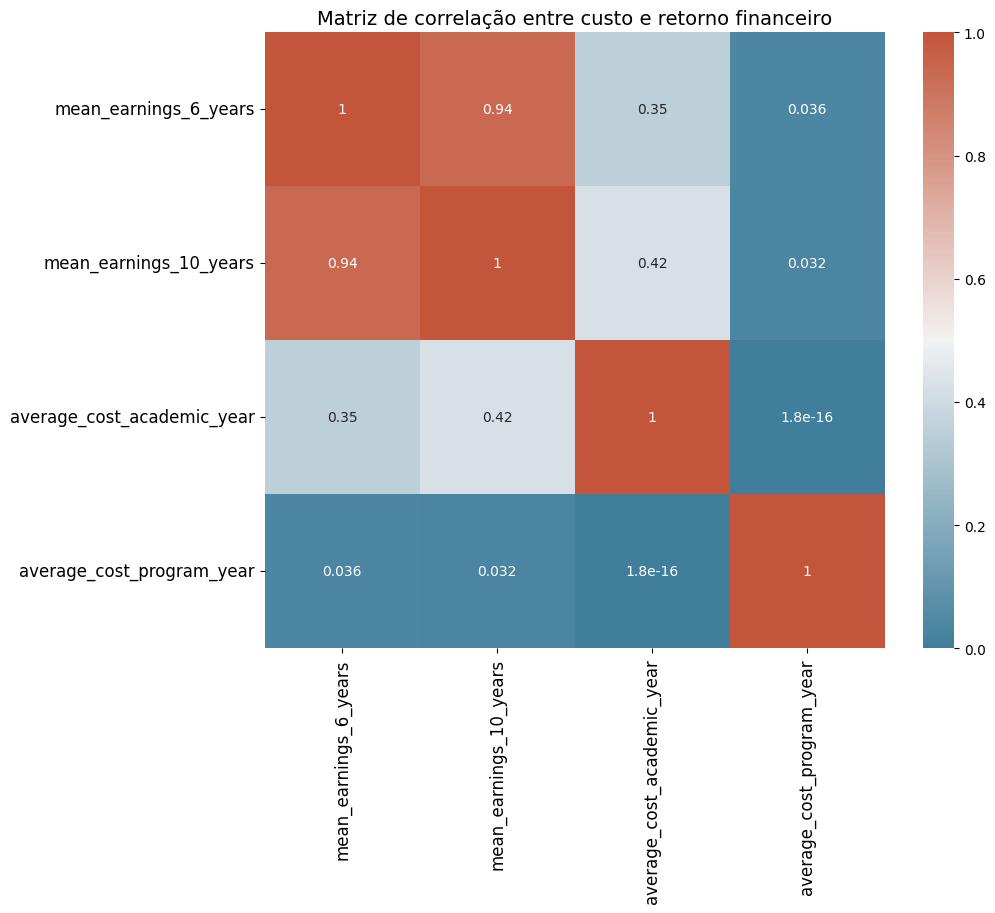

In [14]:
# Heatmap de correlacao entre custo e ganhos

import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['mean_earnings_6_years','mean_earnings_10_years',
       'average_cost_academic_year', 'average_cost_program_year']].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True,
            annot_kws={'size': 10},
            cmap=sns.diverging_palette(230, 20, as_cmap=True))

plt.xticks(fontsize=12)  # X-axis label size
plt.yticks(fontsize=12)  # Y-axis label size

plt.title('Matriz de correlação entre custo e retorno financeiro', fontsize=14)

# plt.savefig('correlation_matrix_custo_retorno.png', bbox_inches='tight')
plt.show()

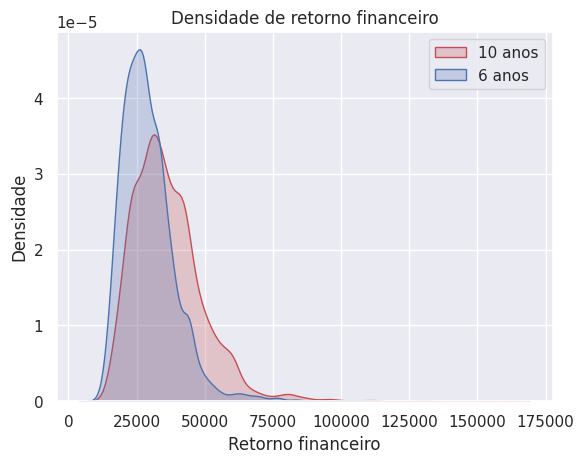

In [15]:
# Grafico de densidade em relacao aos retornos financeiros

sns.set_theme(style="darkgrid")
sns.kdeplot(df['mean_earnings_10_years'], fill=True, color="r")
sns.kdeplot(df['mean_earnings_6_years'], fill=True, color="b")
plt.title('Densidade de retorno financeiro')
plt.xlabel('Retorno financeiro')
plt.ylabel('Densidade')
plt.legend(['10 anos', '6 anos'])
plt.savefig('densidade_retorno.png', bbox_inches='tight')
plt.show()

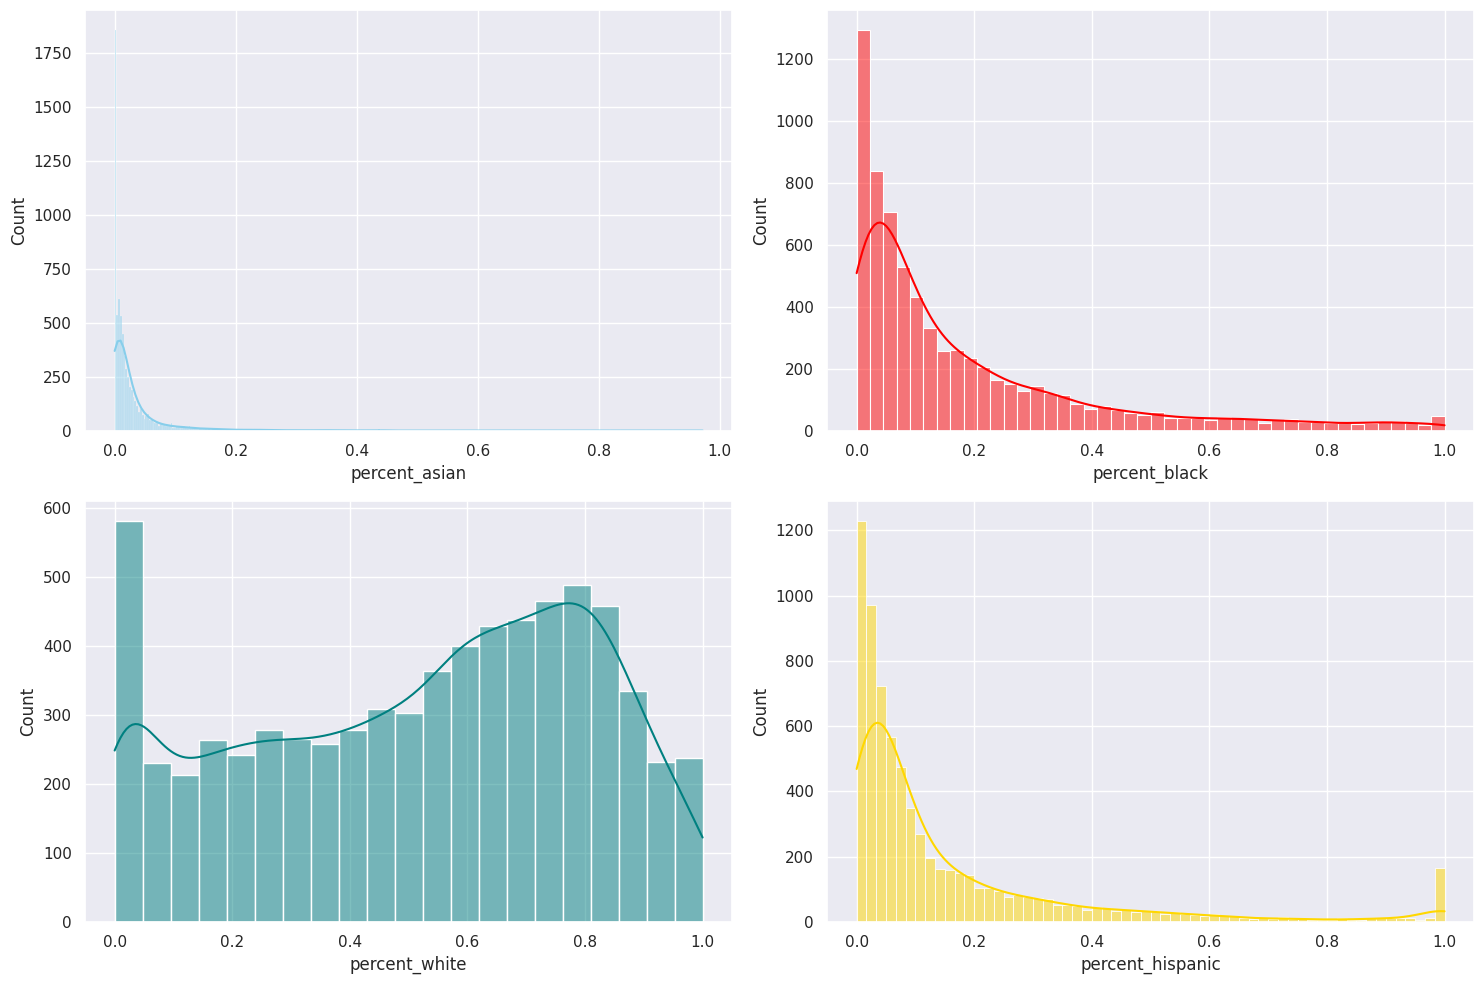

In [16]:
# Grafico sobre a distribuicao de raca nas universidades

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 10)) # Create a 2x2 grid of subplots

# Plot on each subplot
sns.histplot(x=df['percent_asian'], data=df, color="skyblue", kde=True, ax=axs[0, 0])
sns.histplot(x=df['percent_black'], data=df, color="red", kde=True, ax=axs[0, 1])
sns.histplot(x=df['percent_white'], data=df, color="teal", kde=True, ax=axs[1, 0])
sns.histplot(x=df['percent_hispanic'], data=df, color="gold", kde=True, ax=axs[1, 1])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()
# plt.savefig('histograma_raca.png', bbox_inches='tight')

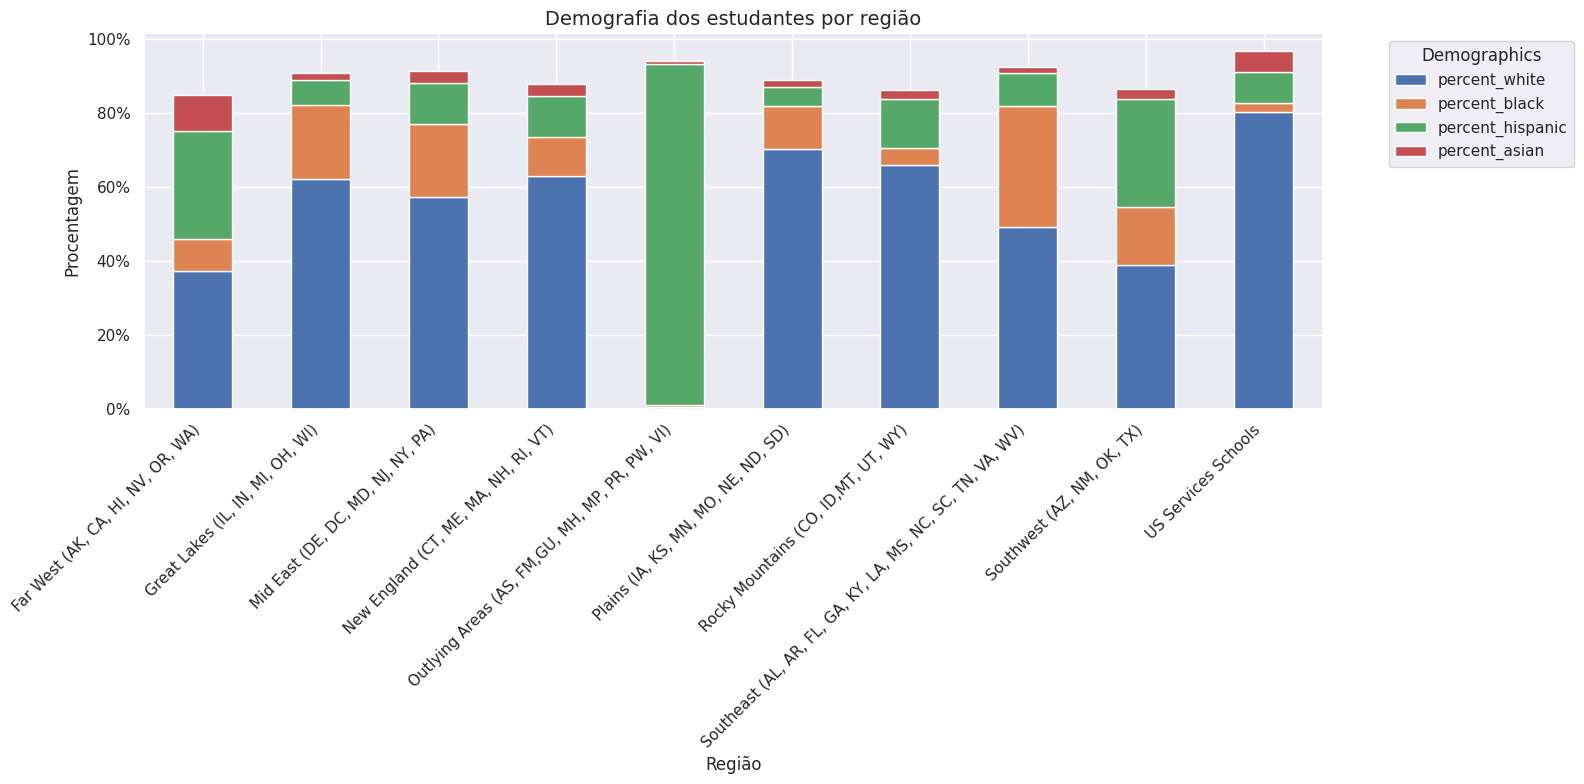

In [17]:
# Grafico de barras "stacked" para demonstrar a demografia dos estudantes

diversity_cols = ['percent_white', 'percent_black', 'percent_hispanic',
                    'percent_asian']

# Calculate average percentages by region
diversity_by_region = df.groupby('region')[diversity_cols].mean()

# Create stacked bar plot
ax = diversity_by_region.plot(kind='bar', stacked=True, figsize=(16, 8))

plt.title('Demografia dos estudantes por região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Procentagem', fontsize=12)
plt.legend(title='Demographics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust x-axis labels
plt.xticks(rotation=45, ha='right')  # ha='right' aligns labels to the right

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{100*x:.0f}%'))

plt.tight_layout()
plt.savefig('demografia_por_regiao.png', bbox_inches='tight')
plt.show()

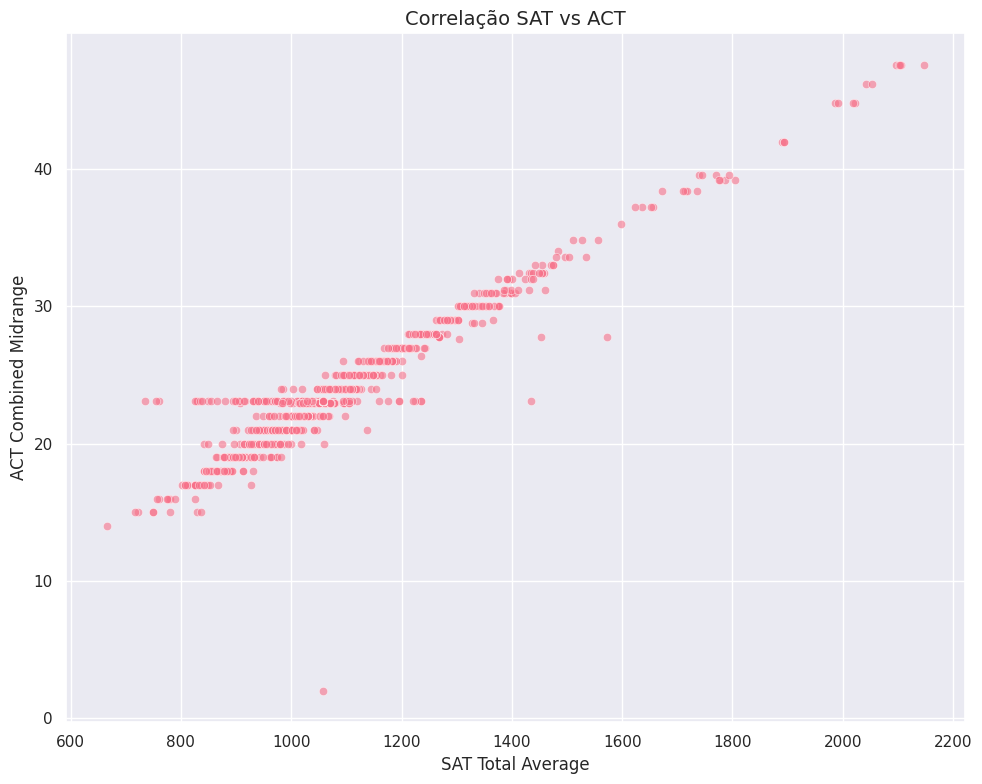

In [18]:
# Grafico de correlacao entre as notas do SAT e ACT

sns.set_palette("husl")

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df,
                x='sat_total_average',
                y='act_combined_midrange',
                alpha=0.6)

plt.title('Correlação SAT vs ACT', fontsize=14)
plt.xlabel('SAT Total Average', fontsize=12)
plt.ylabel('ACT Combined Midrange', fontsize=12)
plt.tight_layout()
plt.savefig('corr_act_sat.png', bbox_inches='tight')
plt.show()

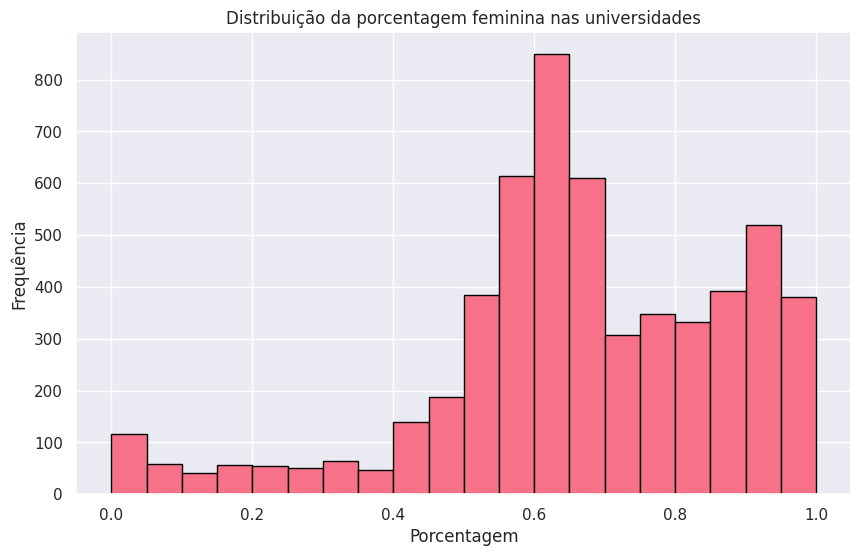

In [19]:
# Grafico da distribuição da porcentagem feminina nas universidades

plt.figure(figsize=(10, 6))
plt.hist(df['percent_female'], bins=20, edgecolor='black')
plt.title('Distribuição da porcentagem feminina nas universidades')
plt.ylabel('Frequência')
plt.xlabel('Porcentagem')
plt.show()

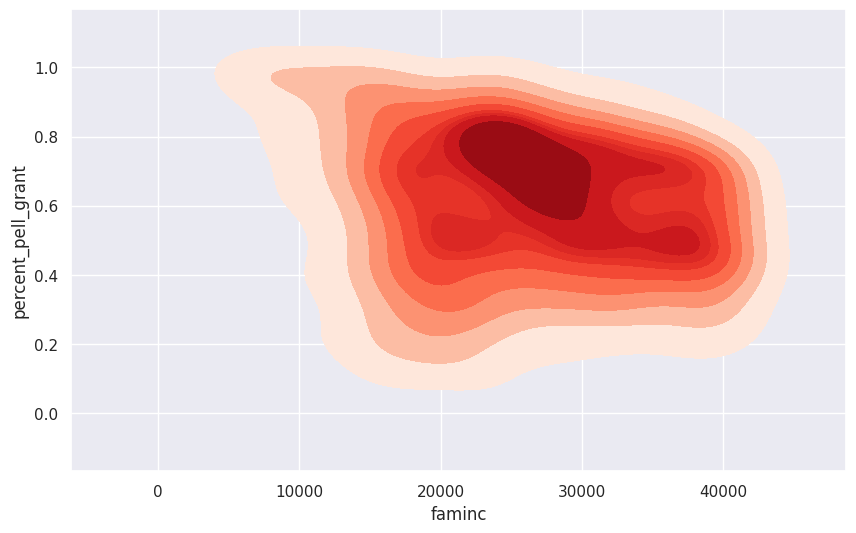

In [20]:
# Fazer grafico de densidade
df_low_faminc = df[df['faminc'] < df['faminc'].mean()]

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))

ax = sns.kdeplot(
    x=df_low_faminc['faminc'],
    y=df_low_faminc['percent_pell_grant'],
    cmap="Reds",
    fill=True,
)

plt.show()

In [21]:
# O plot de coordenadas paralelas foi refeito utilizando vega altair
df_high_female = df[(df['percent_female'] > df['percent_female'].mean()) & (df['percent_female'] < 1)]
df_high_female = df_high_female.sort_values(by='percent_female', ascending=False).head(100)
df_high_female['p_fem_class'] = 1

df_low_female = df[(df['percent_female'] < df['percent_female'].mean()) & (df['percent_female'] > 0)]
df_low_female = df_low_female.sort_values(by='percent_female', ascending=True).head(100)
df_low_female['p_fem_class'] = 0

source = pd.concat([df_high_female, df_low_female], axis=0)

alt.Chart(source).transform_window(
    index='count()'
).transform_fold(
    ['percent_female',  'sat_total_average','act_combined_midrange'] # Reordered list
).transform_joinaggregate(
     min='min(value)',
     max='max(value)',
     groupby=['key']
).transform_calculate(
    minmax_value=(datum.value-datum.min)/(datum.max-datum.min),
    mid=(datum.min+datum.max)/2
).mark_line().encode(
    x='key:N',
    y='minmax_value:Q',
    color='p_fem_class:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

alt.Chart(...)

In [22]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# Fazendo uma análise do mercado de trabalho, existe uma correlação entre os ganhos futuros e a demografia dos estudantes? Ou, uma correlação dos ganhos com as mulheres?

In [23]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Enable default renderer
alt.renderers.enable('default')

# Define your columns
diversity_cols = ['percent_white', 'percent_black', 'percent_hispanic', 'percent_asian', 'percent_female']
earn_cols = ['mean_earnings_6_years', 'mean_earnings_10_years']
corr_cols = earn_cols + diversity_cols

# Create range sliders for each diversity column
sliders = {}
for col in diversity_cols:
    min_value = df[col].min()
    max_value = df[col].max()
    sliders[col] = widgets.FloatRangeSlider(
        value=[min_value, max_value],
        min=min_value,
        max=max_value,
        step=(max_value - min_value) / 100,
        description=col,
        continuous_update=False,
        layout=widgets.Layout(width='500px')
    )

# Function to update the heatmap based on slider values
def update_heatmap(**kwargs):
    clear_output(wait=True)

    # Filter the DataFrame based on slider values
    filtered_df = df.copy()
    drop_cols = []
    for col in diversity_cols:
        min_val, max_val = kwargs[col]
        filtered_df = filtered_df[(filtered_df[col] >= min_val) & (filtered_df[col] <= max_val)]

    if filtered_df.shape[0] < 2:
        print("Not enough data to compute correlations with the selected filters.")
        display(ui)  # Display the UI again after the output is cleared
        return

    # Calculate the correlation matrix
    corr = filtered_df[corr_cols].corr()

    # Prepare data for heatmap
    corr_melt = corr.reset_index().melt(id_vars='index')
    corr_melt.columns = ['variable', 'column', 'correlation']

    base = alt.Chart(corr_melt).encode(
        x=alt.X('column:N', title='', axis=alt.Axis(labelFontSize=12)),
        y=alt.Y('variable:N', title='', axis=alt.Axis(labelFontSize=12)),
    )

    heatmap = base.mark_rect().encode(
        color=alt.Color('correlation:Q', scale=alt.Scale(scheme='redblue', domain=[-1, 1])),
        tooltip=[alt.Tooltip('variable:N'), alt.Tooltip('column:N'), alt.Tooltip('correlation:Q', format='.2f')]
    )

    text = base.mark_text(size=14, font='Arial').encode(
        text=alt.Text('correlation:Q', format='.2f'),
        color=alt.condition(
            'datum.correlation > 0.5 || datum.correlation < -0.5',
            alt.value('white'),
            alt.value('black')
        )
    )

    chart = (heatmap + text).properties(
        width=800,
        height=600
    )

    display(ui, chart)

# Combine sliders into a single UI container
ui = widgets.VBox([sliders[col] for col in diversity_cols])

# Create an interactive output
out = widgets.interactive_output(update_heatmap, sliders)

# Display the sliders and the output area
display(out)

Output()

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame
data = df[corr_cols]

scaler = MinMaxScaler()
data = pd.DataFrame(
    scaler.fit_transform(data),
    columns=data.columns
)
data_melt = data.reset_index().melt(id_vars='index', var_name='Category', value_name='Value')

# Selection and filtering category
categorias = ['percent_female', 'percent_white', 'percent_black', 'percent_asian', 'percent_hispanic']
bar_charts = []
selection = alt.selection_interval()

for categoria in categorias:
    bar_chart = alt.Chart(data_melt).mark_bar().encode(
        alt.X('Value:Q', bin=alt.Bin(maxbins=20)),
        alt.Y('count()'),
        alt.Color('Category:N'),
        opacity=alt.condition(selection, alt.value(1.0), alt.value(0.2))
    ).transform_filter(
        alt.FieldEqualPredicate(field='Category', equal=categoria)
    ).properties(
        width=600,
        height=100
    ).add_selection(
        selection
    )
    bar_charts.append(bar_chart)


# Parallel Coordinates Plot
parallel_chart = alt.Chart(data_melt).mark_line(opacity=0.3).transform_filter(
    selection
).encode(
    x='Category:N',
    y=alt.Y('Value:Q', scale=alt.Scale(domain=[0, 1])), # Explicitly set domain for percentages
    detail='index:N',
    color=alt.value('steelblue')
).properties(
    width=800,
    height=400
).interactive()

# Combine charts
chart = alt.vconcat(parallel_chart, *bar_charts)
chart.display()

Output hidden; open in https://colab.research.google.com to view.

# Nos estados mais conservadores, a porcentagem de estudantes mulheres é inferior a média nacional? A conclusão da graduação é a mesma que nos outros estados?

In [25]:
from vega_datasets import data
import geopandas as gpd
import json

# Load US states GeoJSON data
states = alt.topo_feature(data.us_10m.url, 'states')

# Ensure state names match between your DataFrame and the GeoJSON file
# You might need to map state names to state IDs used in the GeoJSON file
state_id_map = {
    'AL': 1, 'AK': 2, 'AZ': 4, 'AR': 5, 'CA': 6, 'CO': 8, 'CT': 9,
    'DE': 10, 'DC': 11, 'FL': 12, 'GA': 13, 'HI': 15, 'ID': 16, 'IL': 17,
    'IN': 18, 'IA': 19, 'KS': 20, 'KY': 21, 'LA': 22, 'ME': 23, 'MD': 24,
    'MA': 25, 'MI': 26, 'MN': 27, 'MS': 28, 'MO': 29, 'MT': 30,
    'NE': 31, 'NV': 32, 'NH': 33, 'NJ': 34, 'NM': 35, 'NY': 36,
    'NC': 37, 'ND': 38, 'OH': 39, 'OK': 40, 'OR': 41, 'PA': 42,
    'RI': 44, 'SC': 45, 'SD': 46, 'TN': 47, 'TX': 48, 'UT': 49,
    'VT': 50, 'VA': 51, 'WA': 53, 'WV': 54, 'WI': 55, 'WY': 56
}

all_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

conservative_states = ['AL', 'AR', 'CO', 'ID', 'KS', 'KY', 'LA', 'MO', 'MS', 'MT', 'OK', 'SC', 'TN', 'TX', 'UT', 'WY']

conservadores = {
    'state': all_states,
    'conservative': [state in conservative_states for state in all_states]
}

variable_titles = {
    'percent_female': 'Porcentagem de estudantes femininas',
    'conservative': 'Indicador de estado conservador',
    'completion_rate': 'Taxa de conclusão da graduação'
}

# dados das porcentagens femininas por estado
state_female_percent = df.groupby('state')['percent_female'].mean().reset_index()
state_female_percent['id'] = state_female_percent['state'].map(state_id_map)

# dados da completude da graducao por estado
state_comp_rate = df.groupby('state')['completion_rate'].mean().reset_index()

# join das tabelas
combined_df = pd.merge(state_comp_rate, state_female_percent, on='state', how='inner')
combined_df = pd.merge(combined_df, pd.DataFrame(conservadores), on='state', how='inner')

# lista para guardar as variaveis a serem observadas
variable_list = ['percent_female', 'conservative', 'completion_rate']

states = alt.topo_feature(data.us_10m.url, 'states')

charts = []

for var in variable_list:
    var_title = variable_titles[var]

    # Prepare data for plotting
    df_plot = combined_df.copy()
    var_type = 'Q'

    # Define the brush selection over the variable chart
    brush = alt.selection_interval(encodings=['x'])

    # Variable chart (histogram) with brush selection
    var_chart = alt.Chart(df_plot).mark_bar().encode(
        x=alt.X(f'{var}:Q', bin=alt.Bin(maxbins=30), title=var_title),
        y=alt.Y('count()', title='Count'),
        tooltip=[alt.Tooltip(f'{var}:Q', format=".2f"), alt.Tooltip('count()', title='Count')]
    ).add_selection(
        brush
    ).properties(
        width=600,
        height=100,
        title=f'Distribution of {var_title}'
    )

    # Map chart filtered by brush selection
    chart = alt.Chart(states).mark_geoshape().encode(
        color=alt.Color(
            f'{var}:Q',
            scale=alt.Scale(scheme='blues'),
            legend=alt.Legend(title=var_title)
        ),
        tooltip=['state:N', 'conservative:N', 'percent_female:Q', 'completion_rate:Q']
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(combined_df, 'id', variable_list+['state', 'conservative'])
    ).transform_filter(
        brush
    ).project(
        type='albersUsa'
    ).properties(
        width=600,
        height=400
    )

    # Combine the variable chart and map vertically
    combined_chart = alt.vconcat(var_chart, chart).resolve_scale(color='independent').properties(
        title=var_title
    )

    charts.append(combined_chart)

# Combine all charts vertically
final_chart = alt.vconcat(*charts)

final_chart

<ipython-input-25-fa0caf83b9f8>:75: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  ).add_selection(
<ipython-input-25-fa0caf83b9f8>:75: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  ).add_selection(
<ipython-input-25-fa0caf83b9f8>:75: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.VConcatChart(...)

# Quais são as principais características que distinguem uma universidade com alta taxa de estudantes bolsistas de uma universidade com baixa taxa de bolsistas? E em relação a taxa de estudantes de meio período?

In [26]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.7 MB/s eta 0:00:00


In [27]:
import umap.umap_ as umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Categorizando em High para universidades com numeros altos de bolsistas e Low com numero baixo de bolsistas
threshold = df['percent_pell_grant'].median()
df['pell_grant_category'] = np.where(df['percent_pell_grant'] > threshold, 'High', 'Low')

# Select numeric features and handle missing values
numeric_features = df.drop(['UNITID'], axis=1).select_dtypes(include=[np.number]).fillna(0)

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=30)
embedding = reducer.fit_transform(numeric_features)

scaler = StandardScaler()
embedding_scaled = scaler.fit_transform(numeric_features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(embedding_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Category'] = df['pell_grant_category']

# Create a DataFrame with the embeddings and categories
embedding_df = pd.DataFrame({
    'UMAP1': embedding[:, 0],
    'UMAP2': embedding[:, 1],
    'Category': df['pell_grant_category']
})

In [28]:
# Plot using Altair
chart = alt.Chart(embedding_df).mark_circle(size=60).encode(
    x='UMAP1',
    y='UMAP2',
    tooltip=['UMAP1', 'UMAP2', 'Category'],
    color=alt.Color('Category:N')
).properties(
    width=600,
    height=400,
    title='UMAP Projection of Universities'
).interactive()

pca_chart = alt.Chart(pca_df).mark_circle().encode(
    x='PC1',
    y='PC2',
    color='Category:N',
    tooltip=['PC1', 'PC2', 'Category']
).properties(
    width=600,
    height=400,
    title='PCA Plot com Target'
).interactive()

chart | pca_chart

alt.HConcatChart(...)

In [29]:
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# Combine embeddings with original features
combined_df = pd.concat([embedding_df, numeric_features.reset_index(drop=True)], axis=1)

# Calculate correlations between UMAP axes and original features
correlation = combined_df.corr().loc[numeric_features.columns, ['UMAP1', 'UMAP2']].reset_index()
correlation = correlation.melt(id_vars='index', var_name='UMAP Axis', value_name='Correlation')

# Concatenar os dataframes
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
combined_df_pca = pd.concat([numeric_features.reset_index(drop=True), pca_df], axis=1)

# Calcular a correlação
correlation_pca = combined_df_pca.corr().loc[numeric_features.columns, ['PC1', 'PC2']].reset_index()
correlation_pca = correlation_pca.melt(id_vars='index', var_name='PC', value_name='Correlation')

# Plot the correlations using Altair
chart = alt.Chart(correlation).mark_rect().encode(
    x=alt.X('UMAP Axis:N', title='Eixos do UMAP'),
    y=alt.Y('index:N', title='Features'),
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='redblue'), legend=alt.Legend(title='Correlação')),
    tooltip=['index', 'UMAP Axis', 'Correlation']
).properties(
    width=300,
    height=600,
    title='Correlação entre os eixos do UMAP e features originais'
)

chart_pca = alt.Chart(correlation_pca).mark_rect().encode(
    x=alt.X('PC:N', title='Componentes Principais'),
    y=alt.Y('index:N', title='Features'),
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='redblue'), legend=alt.Legend(title='Correlação')),
    tooltip=['index', 'PC', 'Correlation']
).properties(
    width=300,
    height=600,
    title='Correlação entre os componentes do PCA e as features originais'
)

chart | chart_pca

alt.HConcatChart(...)

In [30]:
# Categorizando em High para universidades com numeros altos de estudantes de meio periodo
# e Low com numero baixo de estudantes de meio periodo
threshold = df['percent_part_time'].median()
df['part_time_category'] = np.where(df['percent_part_time'] > threshold, 'High', 'Low')

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Category'] = df['part_time_category']

# Create a DataFrame with the embeddings and categories
embedding_df = pd.DataFrame({
    'UMAP1': embedding[:, 0],
    'UMAP2': embedding[:, 1],
    'Category': df['part_time_category']
})

# Vamos utilizar o mesmo embedding do plot anterior
chart = alt.Chart(embedding_df).mark_circle(size=60).encode(
    x='UMAP1',
    y='UMAP2',
    color='Category',
    tooltip=['UMAP1', 'UMAP2', 'Category']
).properties(
    width=600,
    height=400,
    title='UMAP Projection of Universities'
).interactive()

pca_chart = alt.Chart(pca_df).mark_circle().encode(
    x='PC1',
    y='PC2',
    color='Category:N',
    tooltip=['PC1', 'PC2', 'Category']
).properties(
    width=600,
    height=400,
    title='PCA Plot com Target'
).interactive()

chart | pca_chart

alt.HConcatChart(...)

# As notas altas para entrar em uma universidade tem relação com o nível de pesquisa (carnegie classification) da universidade? Ou essas universidades gastam mais por aluno para oferecer melhores experiências acadêmicas?

In [31]:
brush = alt.selection_interval(encodings=['x', 'y'])

SAT = alt.Chart(df).mark_circle(color='green').encode(

    alt.Y('carnegie_basic_classification').title(None),
    alt.X('sat_total_average').title('Média do SAT'),
    tooltip='school_name'

).add_params(brush).properties(width=450).interactive()

ACT = alt.Chart(df).mark_circle(color='blue').encode(

    alt.Y('carnegie_basic_classification').title(None),
    alt.X('act_combined_midrange').title('Mediana do ACT'),
    tooltip='school_name'

).add_params(brush).properties(width=450).interactive()

(SAT | ACT).configure_axis(
    labelAngle=0,
    labelLimit=500,
    labelFontSize=12
)

Output hidden; open in https://colab.research.google.com to view.

No segundo gráfico, vamos usar a variável **spend_per_student** em função da classificação Carnegie.

In [32]:
gasto_por_aluno = alt.Chart(df).mark_circle(color='green').encode(

    alt.Y('carnegie_basic_classification').title(None),
    alt.X('spend_per_student').title('Gasto por aluno'),
    tooltip='school_name'

).properties(width=600).configure_axis(
    labelAngle=0,
    labelLimit=500,
    labelFontSize=12
).add_params(brush).properties(width=600).interactive()

gasto_por_aluno

Output hidden; open in https://colab.research.google.com to view.

# Os estudantes cujas famílias apresentam renda menor têm taxa de conclusão maior? Esses estudantes após terminarem a faculdade conseguem obter retornos financeiros maiores que a média? Existe uma correlação com estudantes de meio período?


In [33]:
brush = alt.selection_interval(encodings=['x', 'y'])

renda_conclusao = alt.Chart(df).mark_circle().encode(

    alt.X('faminc').title('Renda Familiar'),
    alt.Y('completion_rate').title('Taxa de conclusão'),
    tooltip = (['school_name', 'faminc', 'completion_rate'])
).properties(width=450, height=300).add_params(brush).interactive()

renda_meio_periodo = alt.Chart(df).mark_circle().encode(

    alt.X('faminc').title('Renda Familiar'),
    alt.Y('percent_part_time').title('Percentual de alunos de meio-período'),
    tooltip = (['school_name', 'faminc', 'percent_part_time'])
).properties(width=450, height=300).add_params(brush).interactive()

df_renda = df
df_renda['ganho_sobre_renda_6_anos'] = df['mean_earnings_6_years'] / df['faminc']
df_renda['ganho_sobre_renda_10_anos'] = df['mean_earnings_10_years'] / df['faminc']

renda_retorno_6_anos = alt.Chart(df_renda).mark_circle().encode(

    alt.X('faminc').title('Renda Familiar'),
    alt.Y('ganho_sobre_renda_6_anos').title('Ganho em relação à renda anterior (6 anos)'),
    tooltip = (['school_name', 'faminc', 'mean_earnings_6_years', 'ganho_sobre_renda_6_anos'])
).properties(width=450, height=300).add_params(brush).interactive()

renda_retorno_10_anos = alt.Chart(df_renda).mark_circle().encode(

    alt.X('faminc').title('Renda Familiar'),
    alt.Y('ganho_sobre_renda_10_anos').title('Ganho em relação à renda anterior (10 anos)'),
    tooltip = (['school_name', 'faminc', 'mean_earnings_10_years', 'ganho_sobre_renda_10_anos'])
).properties(width=450, height=300).add_params(brush).interactive()

renda_conclusao & renda_meio_periodo & (renda_retorno_6_anos | renda_retorno_10_anos)

Output hidden; open in https://colab.research.google.com to view.